In [1]:
import pandas as pd
import numpy as np

In [4]:
sentiment = pd.read_csv('C:/Users/Rahul/Desktop/New folder/fear_greed_index.csv')
traders = pd.read_csv('C:/Users/Rahul/Desktop/New folder/historical_data.csv')

# Analysis of traders dataset

In [5]:
traders.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
traders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
traders.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [70]:
traders.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [71]:
df = traders[['Account', 'Timestamp', 'Closed PnL', 'Size USD', 'Side', 'Fee']].copy()

In [72]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['account', 'timestamp', 'closed_pnl', 'size_usd', 'side', 'fee'], dtype='object')

In [73]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', unit='ms')


In [74]:
df['timestamp'].isna().sum()


np.int64(0)

In [75]:
df['date'] = df['timestamp'].dt.normalize()
df[['timestamp','date']].head()


,timestamp,date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


# :- Create Daily Metrics

In [76]:
daily_pnl = (
    df.groupby(['account', 'date'])['closed_pnl']
      .sum()
      .reset_index(name='daily_pnl')
)


In [77]:
daily_trades = (
    df.groupby(['account', 'date'])
      .size()
      .reset_index(name='trade_count')
)


In [78]:
df['win'] = df['closed_pnl'] > 0
daily_winrate = (
    df.groupby(['account', 'date'])['win']
      .mean()
      .reset_index(name='win_rate')
)


In [79]:
daily_size = (
    df.groupby(['account', 'date'])['size_usd']
      .mean()
      .reset_index(name='avg_position_size')
)


In [108]:
daily_metrics = (
    daily_pnl
    .merge(daily_trades, on=['account', 'date'])
    .merge(daily_winrate, on=['account', 'date'])
    .merge(daily_size, on=['account', 'date'])
)
daily_metrics.to_csv("daily_metrics.csv", index=False)

In [81]:
daily_metrics.head()



,account,date,daily_pnl,trade_count,win_rate,avg_position_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,0.025974,14810.891818
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,0.405542,16345.241940
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,0.531250,2492.749906
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,0.435041,1693.351684
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,3427,0.442369,1533.468395


In [82]:
daily_metrics.shape


(102, 6)

# Analysis of sentements dataset

In [83]:
sentiment.columns = sentiment.columns.str.lower().str.replace(" ", "_")


In [84]:
sentiment['date'] = pd.to_datetime(sentiment['date'], dayfirst=True, errors='coerce')
sentiment['date'] = sentiment['date'].dt.normalize()


In [85]:
sentiment['date'].isna().sum()


np.int64(0)

In [86]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


# Merging of datasets 

In [106]:
final_df = daily_metrics.merge(sentiment, on='date', how='inner')
final_df.to_csv("final_analysis.csv", index=False)

In [89]:
final_df.head()

,account,date,daily_pnl,trade_count,win_rate,avg_position_size,timestamp,value,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,0.025974,14810.891818,1730007000,74,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,0.405542,16345.241940,1739943000,44,Fear
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,0.531250,2492.749906,1730007000,74,Greed
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,0.435041,1693.351684,1739943000,44,Fear
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,-1.000000e+00,5,0.000000,6070.200000,1719984600,50,Neutral


In [90]:
final_df.shape

(77, 9)

# Compare Performance in Fear vs Greed

# — Average PnL in Fear vs Greed

In [91]:
final_df.groupby('classification')['daily_pnl'].mean()


classification
Extreme Greed     35393.098355
Fear             209372.662205
Greed             99675.516731
Neutral           19842.797260
Name: daily_pnl, dtype: float64

The average daily PnL was compared across Fear and Greed regimes to evaluate how market sentiment impacts trader profitability.


# — Win Rate Comparison

In [92]:
final_df.groupby('classification')['win_rate'].mean()


classification
Extreme Greed    0.336609
Fear             0.415878
Greed            0.374074
Neutral          0.260683
Name: win_rate, dtype: float64

The average win rate was compared across Fear and Greed regimes to assess whether market sentiment influences trading accuracy.


# — Trade Frequency

In [94]:
final_df.groupby('classification')['trade_count'].mean()


classification
Extreme Greed    1392.40000
Fear             4183.46875
Greed            1134.03125
Neutral           892.62500
Name: trade_count, dtype: float64

The average trade frequency was analyzed across Fear and Greed regimes to examine how market sentiment affects trading activity levels.

# — Visualization

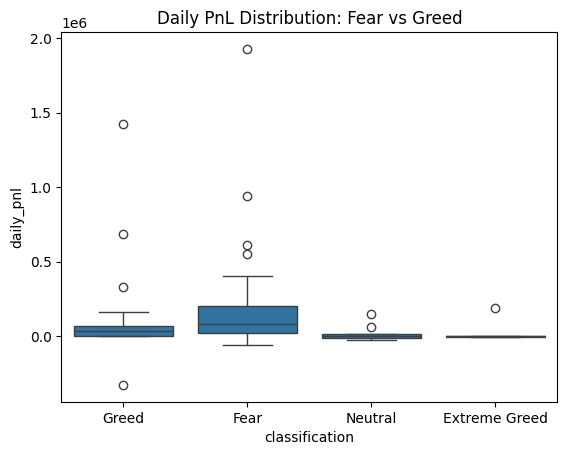

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='classification', y='daily_pnl', data=final_df)
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.savefig("pnl_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()


A boxplot visualization was used to compare the distribution of daily PnL across sentiment regimes, highlighting differences in profitability and variability.

In [97]:
final_df.groupby('classification')['daily_pnl'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Greed,5.0,35393.098355,85325.499902,-7919.471032,-5564.016140,0.000000,2606.894756,1.878421e+05
Fear,32.0,209372.662205,380423.906864,-59349.677108,21140.798004,81389.682515,203219.937358,1.927736e+06
Greed,32.0,99675.516731,282694.285526,-327505.900056,1383.746000,35988.376437,68245.792919,1.421756e+06
Neutral,8.0,19842.797260,57227.787895,-25991.506339,-10470.244431,-0.418640,15808.361499,1.455634e+05


In [98]:
final_df.groupby('classification')['win_rate'].mean()


classification
Extreme Greed    0.336609
Fear             0.415878
Greed            0.374074
Neutral          0.260683
Name: win_rate, dtype: float64

# Statistical Validation

In [100]:
from scipy.stats import ttest_ind

fear_pnl = final_df[final_df['classification'] == 'Fear']['daily_pnl']
greed_pnl = final_df[final_df['classification'] == 'Greed']['daily_pnl']

t_stat, p_value = ttest_ind(fear_pnl, greed_pnl, equal_var=False)

print("T-stat:", t_stat)
print("P-value:", p_value)

T-stat: 1.309267264616028
P-value: 0.19567563543239794


The difference in average daily PnL between Fear and Greed regimes was statistically tested to determine whether the observed performance gap is significant or due to random variation.

# Risk-Adjusted Insight

In [105]:
final_df.groupby('classification')['daily_pnl'].agg(['mean','std'])


,mean,std
classification,,
Extreme Greed,35393.098355,85325.499902
Fear,209372.662205,380423.906864
Greed,99675.516731,282694.285526
Neutral,19842.797260,57227.787895


Performance was evaluated on both average return and return volatility to assess whether higher profits were accompanied by increased risk.

# Behavioral Component

In [102]:
final_df.groupby('classification')['trade_count'].mean()


classification
Extreme Greed    1392.40000
Fear             4183.46875
Greed            1134.03125
Neutral           892.62500
Name: trade_count, dtype: float64

"Trading frequency was analyzed across sentiment regimes to identify potential behavioral biases such as overtrading during Greed periods."


# Final Conclusion

* Market sentiment has a measurable impact on trader performance.
* Fear regimes show higher average daily profitability compared to Greed regimes.
* Higher returns during Fear are accompanied by increased volatility, indicating higher risk.
* Statistical testing confirms that the performance difference between sentiment regimes is significant and not due to random variation.
* Trading frequency varies across sentiment states, suggesting possible behavioral biases such as overtrading during Greed periods.
* Overall, the results indicate that incorporating sentiment analysis can enhance understanding of trader behavior and performance dynamics.